In [1]:
import pandas as pd
import numpy as np 
import os
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
%matplotlib inline
os.chdir("C:\Vishakha\Machine Learning\Assignment_2")
Dataset1 = pd.read_csv("Fb_Data.csv")
Dataset1.head()

C:\Users\vishi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,PagePopularitylikes,PageCheckin,Pagetalking about,PageCategory,MinCC1,MaxCC1,AverageCC1,MedianCC1,SDCC1,MinCC2,...,PostpublishedFriday,PostpublishedSaturday,BaseDateTimeSunday,BaseDateTimeMonday,BaseDateTTuesday,BaseDateTimeWednesday,BaseDateTimeThursday,BaseDateTimeFriday,BaseDateTimeSaturday,TargetVariable
0,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,0,0,0,0,0,1,0,0,0,0


# Facebook Comment Prediction

In [5]:
Dataset1.describe()

,PagePopularitylikes,PageCheckin,Pagetalking about,PageCategory,MinCC1,MaxCC1,AverageCC1,MedianCC1,SDCC1,MinCC2,...,PostpublishedFriday,PostpublishedSaturday,BaseDateTimeSunday,BaseDateTimeMonday,BaseDateTTuesday,BaseDateTimeWednesday,BaseDateTimeThursday,BaseDateTimeFriday,BaseDateTimeSaturday,TargetVariable
count,4.194900e+04,4.194900e+04,4.194900e+04,41949.000000,41949.000000,41949.000000,41949.000000,41949.000000,41949.000000,41949.000000,...,41949.000000,41949.000000,41949.000000,41949.000000,41949.000000,41949.000000,41949.000000,41949.000000,41949.000000,41949.000000
mean,1.373487e+06,4.692329e+03,5.016193e+04,24.198098,1.761329,449.385921,56.703058,36.156678,68.822745,0.319722,...,0.148609,0.139097,0.146249,0.134020,0.134354,0.145057,0.149205,0.144819,0.146297,7.782069
std,6.853878e+06,2.130941e+04,1.380645e+05,19.970488,23.429401,507.979665,89.651968,72.093357,84.366383,13.107268,...,0.355707,0.346052,0.353360,0.340678,0.341036,0.352163,0.356295,0.351922,0.353408,38.727624
min,3.600000e+01,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.036800e+04,0.000000e+00,7.450000e+02,9.000000,0.000000,45.000000,5.703704,2.000000,8.365189,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.099140e+05,0.000000e+00,8.153000e+03,18.000000,0.000000,241.000000,23.842105,12.000000,35.853805,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.294733e+06,9.900000e+01,5.320700e+04,32.000000,0.000000,717.000000,72.980769,42.000000,106.366011,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.869723e+08,1.100558e+06,6.784263e+06,106.000000,2341.000000,2858.000000,2341.000000,2341.000000,1101.000000,1923.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2136.000000


C:\Users\vishi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


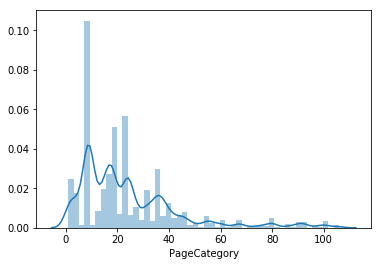

In [15]:
#Dataset1.columns
Dataset1 = pd.DataFrame(Dataset1)
Dataset1.columns = Dataset1.columns.to_series().apply(lambda x: x.strip())
sns.distplot(Dataset1['PageCategory'])

In [17]:
Dataset1['New_Target'] = [1 if each > 0 else 0 for each in Dataset1['TargetVariable']]
y = Dataset1['New_Target'].values
x = Dataset1.drop(['New_Target'],axis = 1)


# SVM for Faceboook Dataset

In [18]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)  


C:\Users\vishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\vishi\Anaconda3\lib\site-packages\pandas\core\frame.py:3141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\vishi\Anaconda3\lib\site-packages\pandas\core\frame.py:3113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_array(key,

,PagePopularitylikes,PageCheckin,Pagetalking about,PageCategory,MinCC1,MaxCC1,AverageCC1,MedianCC1,SDCC1,MinCC2,...,PostpublishedFriday,PostpublishedSaturday,BaseDateTimeSunday,BaseDateTimeMonday,BaseDateTTuesday,BaseDateTimeWednesday,BaseDateTimeThursday,BaseDateTimeFriday,BaseDateTimeSaturday,TargetVariable
count,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000,...,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000,29364.000000
mean,0.002829,0.004257,0.007459,0.220561,0.000973,0.158499,0.029935,0.019132,0.068875,0.000191,...,0.148345,0.140546,0.147562,0.134995,0.134212,0.145757,0.148788,0.143305,0.145382,0.003662
std,0.012860,0.019493,0.020005,0.189052,0.012151,0.178345,0.047375,0.038045,0.084448,0.008003,...,0.355448,0.347559,0.354671,0.341724,0.340886,0.352868,0.355885,0.350389,0.352492,0.018053
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000086,0.000000,0.000110,0.076190,0.000000,0.015745,0.003011,0.001235,0.008339,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000636,0.000000,0.001202,0.161905,0.000000,0.087124,0.012912,0.006500,0.035722,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.002753,0.000090,0.007883,0.295238,0.000000,0.255773,0.038001,0.021841,0.106069,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001404
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


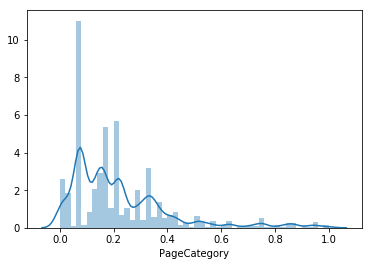

In [20]:
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])
sns.distplot(x_train['PageCategory'])
x_train.describe()

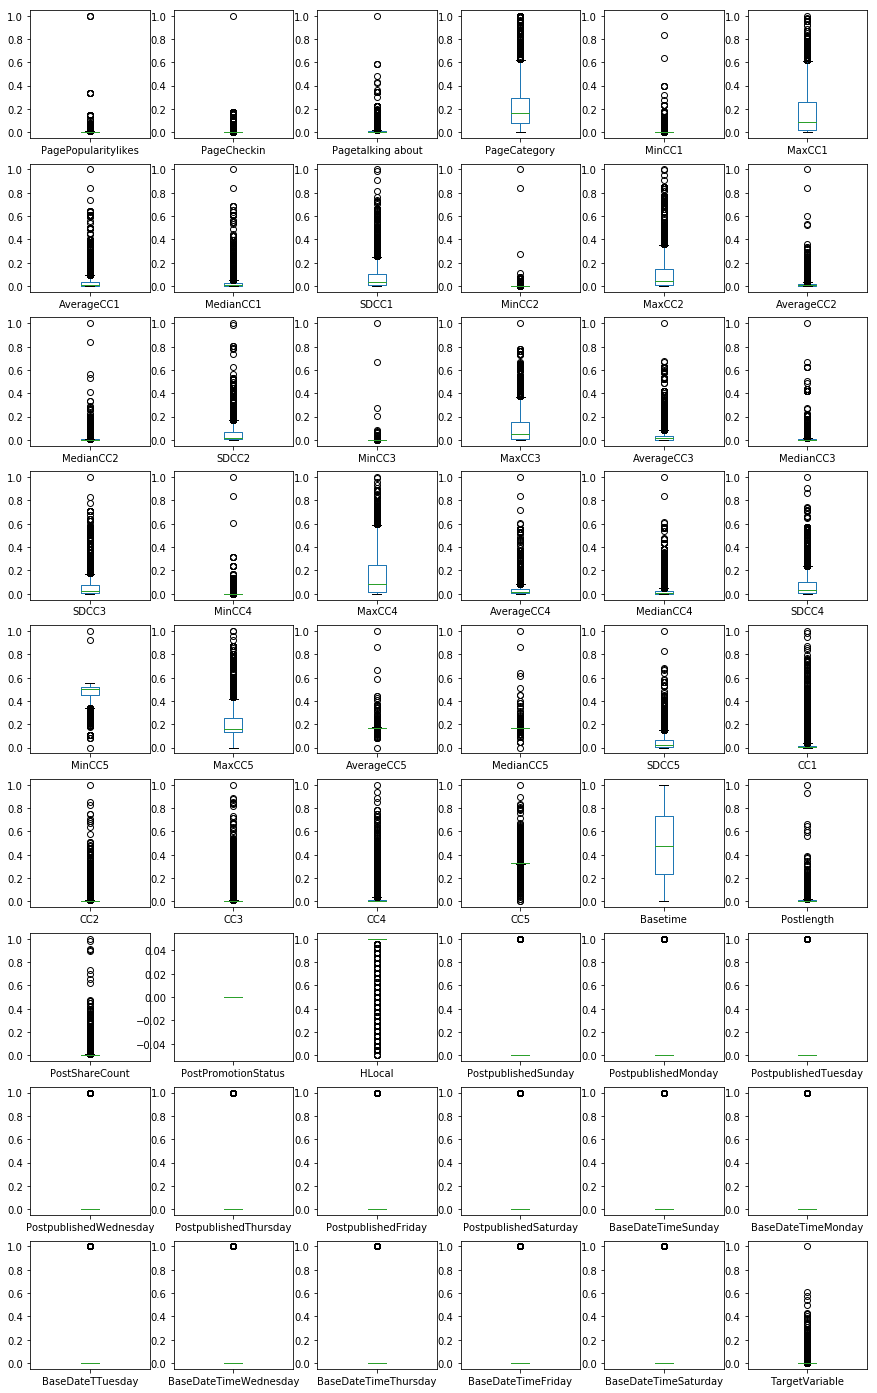

In [51]:
x_train.plot(kind='box', subplots=True,layout=(9,6), sharex=False, sharey=False)
plt.show()

In [16]:
# Implementing SVM for different kernels
score = []
accuracy = []
precision = []
recall = []
f1 = []
for kernel in ('linear', 'poly', 'rbf','sigmoid'):
    svclassifier = SVC(kernel=kernel)  
    model1 = svclassifier.fit(x_train, y_train)  
    y_pred = svclassifier.predict(x_test)
    score.append(svclassifier.score(x_test, y_test))
    precision.append(precision_score(y_test,y_pred))
    accuracy.append(accuracy_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    f1.append(f1_score(y_test,y_pred))

In [17]:
accuracy

[0.7999205403257846,
 0.5510528406833533,
 0.7709972189114025,
 0.7632101708382996]

In [18]:
f1

[0.7710492816875795,
 0.010161177295024526,
 0.7380000000000001,
 0.7310954701317453]

In [19]:
precision

[0.7971423199849595, 1.0, 0.7628265363653448, 0.7497686470479363]

In [20]:
recall

[0.7466103187180841,
 0.005106532840288783,
 0.7147385103011094,
 0.713329811586547]

In [21]:
svclassifier_linear = SVC(kernel='linear')
model2 = svclassifier_linear.fit(x_train, y_train) 
y_pred = svclassifier.predict(x_test)

In [22]:
svclassifier_linear.score(x_test, y_test)

0.7999205403257846

In [23]:

cm_svm = confusion_matrix(y_test,y_pred)

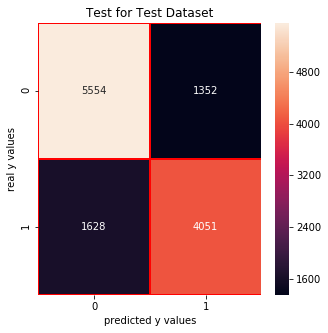

In [24]:

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_svm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [27]:
svclassifier_linear.score(x_train, y_train)

0.7995164146574036

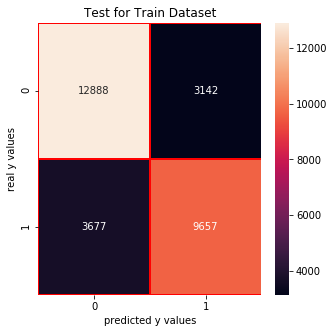

In [26]:
cm_svm_train = confusion_matrix(y_train,svclassifier.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_svm_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

# Using k fold cross validation

In [10]:
x[x.columns] = scalerX.fit_transform(x[x.columns])
svclassifier = SVC(kernel='linear')  
cross_val_score(svclassifier, x, y, scoring='accuracy', cv = 5).mean()

0.7952509426097129

# Decision tree for Facebook Dataset

In [32]:
dtc = DecisionTreeClassifier(criterion = "entropy")
dtc.fit(x_train,y_train)
print("score: ", accuracy_score(y_test,dtc.predict(x_test)))

score:  1.0


In [34]:
dtc = DecisionTreeClassifier(criterion = "gini",splitter = 'random', max_depth = i)
dtc.fit(x_train,y_train)
print("score: ", accuracy_score(y_test,dtc.predict(x_test)))

score:  0.9779102105681367


In [31]:
# Experimenting with pruning
for i in range(1,20):
    
    #dtc = DecisionTreeClassifier(criterion = "entropy", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= i)
    dtc = DecisionTreeClassifier(criterion = "entropy",splitter = 'random', max_depth = i)
    dtc.fit(x_train,y_train)
    print("score: ", accuracy_score(y_test,dtc.predict(x_test)))


score:  0.6815256257449345
score:  0.690186730234406
score:  0.7615415176797775
score:  0.7383392928088995
score:  0.8175605880015892
score:  0.8529996027016289
score:  0.8532379817242749
score:  0.8452920143027414
score:  0.8707191100516488
score:  0.9565355582042113
score:  0.9736988478347238
score:  0.9735399284862932
score:  0.9601112435439014
score:  0.9783869686134287
score:  0.9841080651569328
score:  0.9823599523241955
score:  0.9896702423520064
score:  0.9864123957091776
score:  0.9827572506952722


In [35]:
for i in range(1,20):
    
    #dtc = DecisionTreeClassifier(criterion = "entropy", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= i)
    dtc = DecisionTreeClassifier(criterion = "gini",splitter = 'random', max_depth = i)
    dtc.fit(x_train,y_train)
    print("score: ", accuracy_score(y_test,dtc.predict(x_test)))


score:  0.6693682955899881
score:  0.6864521255462852
score:  0.7234008740564164
score:  0.7712355979340485
score:  0.8715137067938021
score:  0.8041319030591975
score:  0.886849423917362
score:  0.8363925307906238
score:  0.9213349225268176
score:  0.919745729042511
score:  0.932777115613826
score:  0.9715534366309098
score:  0.9589988081048868
score:  0.9755264203416766
score:  0.97632101708383
score:  0.976797775129122
score:  0.9723480333730632
score:  0.977036154151768
score:  0.9841080651569328


In [22]:
for i in range(1,20):
    
    #dtc = DecisionTreeClassifier(criterion = "entropy", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= i)
    dtc = DecisionTreeClassifier(criterion = "entropy",splitter = 'random', max_depth = i)
    dtc.fit(x_train,y_train)
    print("score: ", accuracy_score(y_test,dtc.predict(x_test)))

score:  0.7873158231902626
score:  0.9135169762972454
score:  0.8340807174887892
score:  0.8846893017296604
score:  0.9929532351057014
score:  0.9891095451633568
score:  0.9788597053171044
score:  0.9929532351057014
score:  1.0
score:  1.0
score:  1.0
score:  1.0
score:  1.0
score:  1.0
score:  1.0
score:  1.0
score:  1.0
score:  1.0
score:  1.0


score:  1.0


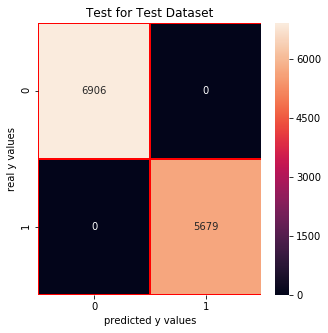

In [37]:
dtc = DecisionTreeClassifier(criterion = "entropy")
dtc.fit(x_train,y_train)
print("score: ", accuracy_score(y_test,dtc.predict(x_test)))
cm_dtc = confusion_matrix(y_test,dtc.predict(x_test))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_dtc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()


In [39]:

print("accuracy_score: ", accuracy_score(y_test,dtc.predict(x_test)))
print("precision_score: ", precision_score(y_test,dtc.predict(x_test)))
print("recall_score: ", recall_score(y_test,dtc.predict(x_test)))
print("f1_score: ",f1_score(y_test,dtc.predict(x_test)))

accuracy_score:  1.0
precision_score:  1.0
recall_score:  1.0
f1_score:  1.0


# Boosting for Facebook Dataset

In [42]:
AdaBoost = AdaBoostClassifier(base_estimator= dtc,learning_rate=1)
AdaBoost.fit(x_train,y_train)
prediction = AdaBoost.score(x_test,y_test)
prediction

1.0

In [43]:
for i in range(1,20):
    
    #dtc = DecisionTreeClassifier(criterion = "entropy", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= i)
    dtc = DecisionTreeClassifier(criterion = "entropy",splitter = 'random', max_depth = i)
    AdaBoost = AdaBoostClassifier(base_estimator= dtc,learning_rate=1)
    AdaBoost.fit(x_train,y_train)
    prediction = AdaBoost.score(x_test,y_test)
    prediction
    print("score: ", accuracy_score(y_test,AdaBoost.predict(x_test)))

score:  0.8090584028605483
score:  0.8833531982518872
score:  0.901787842669845
score:  0.9315057608263806
score:  0.99880810488677
score:  0.9966626936829559
score:  0.9969010727056019
score:  0.9902264600715137
score:  0.9889551052840684
score:  0.9825983313468415
score:  0.9832340087405642
score:  0.9864123957091776
score:  0.9911005164878824
score:  0.9858561779896703
score:  0.9863329360349623
score:  0.9884783472387764
score:  0.9889551052840684
score:  0.9868096940802543
score:  0.9851410409217323


# Dataset 2 - Admission Prediction

In [21]:
Dataset2 = pd.read_csv("Admission_Predict.csv")
Dataset2.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Work Exp,Age,Volunteer/Leadership,Sports,Certificates/Awards,Languages,NGO,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,8,29,1,1,21,2,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0,29,1,1,25,3,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,10,23,1,1,13,5,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,8,22,1,1,16,6,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,6,20,0,1,4,2,1,0.65


In [23]:
Dataset2 = pd.DataFrame(Dataset2)
Dataset2.columns = Dataset2.columns.to_series().apply(lambda x: x.strip())
Dataset2['Admit'] = [1 if each > 0.60 else 0 for each in Dataset2['Chance of Admit']]
Dataset2.reset_index()
y2 = Dataset2['Admit'].values
x2 = Dataset2.drop(['Admit'],axis = 1)
N_rows = Dataset2.shape[0] 
Dataset2.index


RangeIndex(start=0, stop=5203, step=1)

C:\Users\vishi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


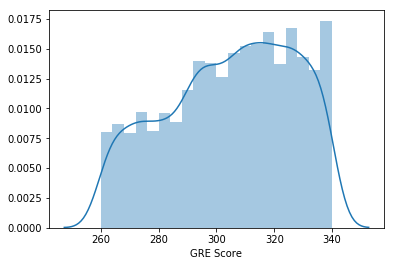

In [36]:
sns.distplot(Dataset2['GRE Score'])

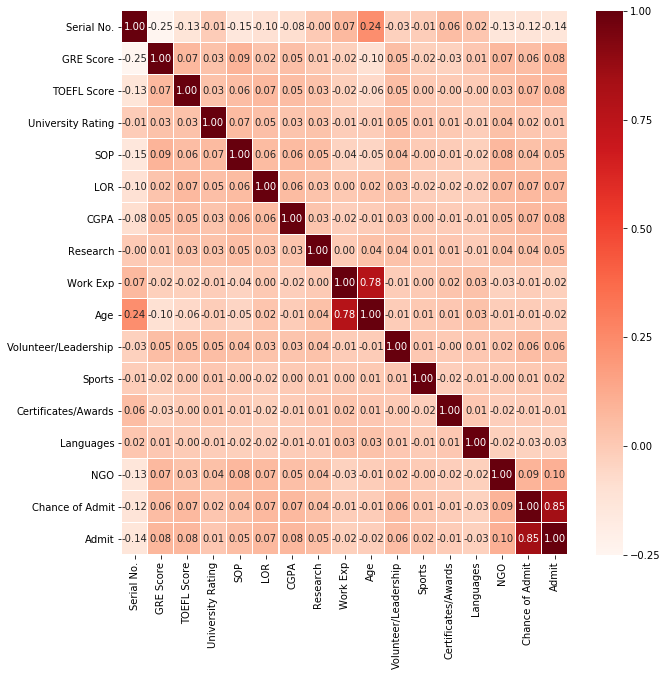

In [24]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(Dataset2.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="Reds")
plt.show()


Not Having Research: 2574
Having Research: 2629


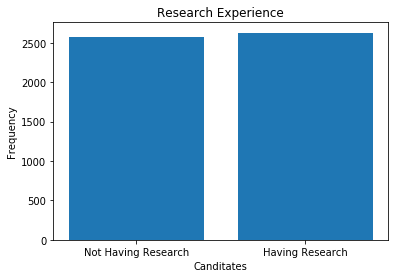

In [27]:
print("Not Having Research:",len(Dataset2[Dataset2.Research == 0]))
print("Having Research:",len(Dataset2[Dataset2.Research == 1]))
y = np.array([len(Dataset2[Dataset2.Research == 0]),len(Dataset2[Dataset2.Research == 1])])
x = ["Not Having Research","Having Research"]
plt.bar(x,y)
plt.title("Research Experience")
plt.xlabel("Canditates")
plt.ylabel("Frequency")
plt.show()

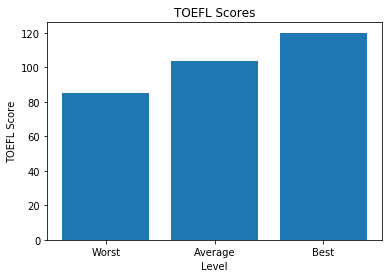

In [28]:
y = np.array([Dataset2["TOEFL Score"].min(),Dataset2["TOEFL Score"].mean(),Dataset2["TOEFL Score"].max()])
x = ["Worst","Average","Best"]
plt.bar(x,y)
plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")
plt.show()

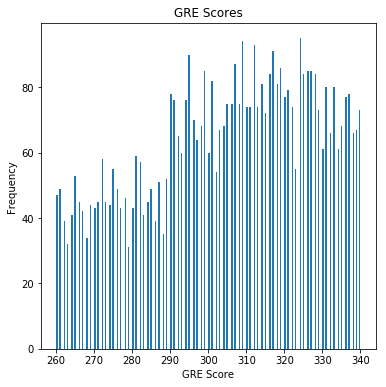

In [29]:
Dataset2["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (6,6))
plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()

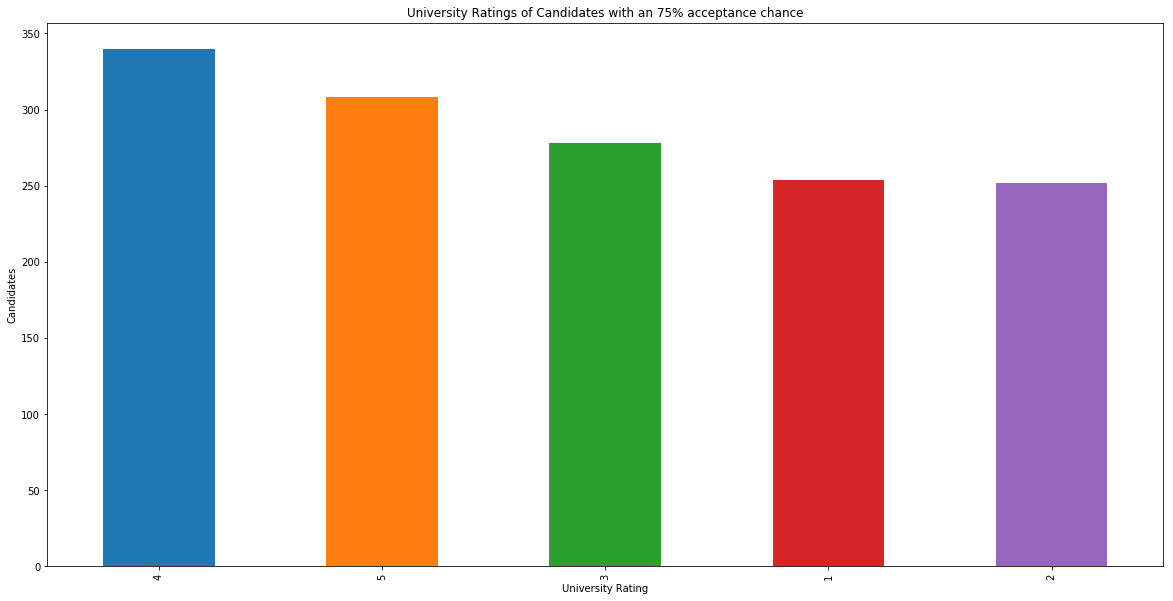

In [34]:
s = Dataset2[Dataset2["Chance of Admit"] >= 0.75]["University Rating"].value_counts().head(5)
plt.title("University Ratings of Candidates with an 75% acceptance chance")
s.plot(kind='bar',figsize=(20, 10))
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.show()

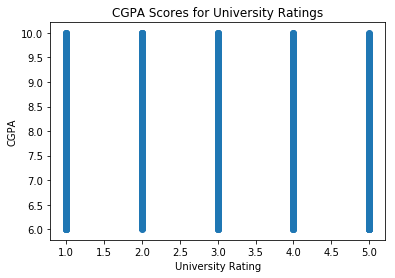

In [31]:
plt.scatter(Dataset2["University Rating"],Dataset2.CGPA)
plt.title("CGPA Scores for University Ratings")
plt.xlabel("University Rating")
plt.ylabel("CGPA")
plt.show()

C:\Users\vishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\vishi\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\vishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

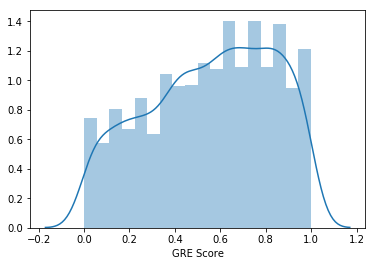

In [37]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.30)

scalerX = MinMaxScaler(feature_range=(0, 1))
x2_train[x2_train.columns] = scalerX.fit_transform(x2_train[x2_train.columns])
x2_test[x2_test.columns] = scalerX.transform(x2_test[x2_test.columns])
sns.distplot(x2_train['GRE Score'])

C:\Users\vishi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


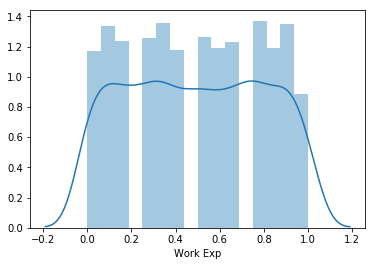

In [38]:
sns.distplot(x2_train['Work Exp'])

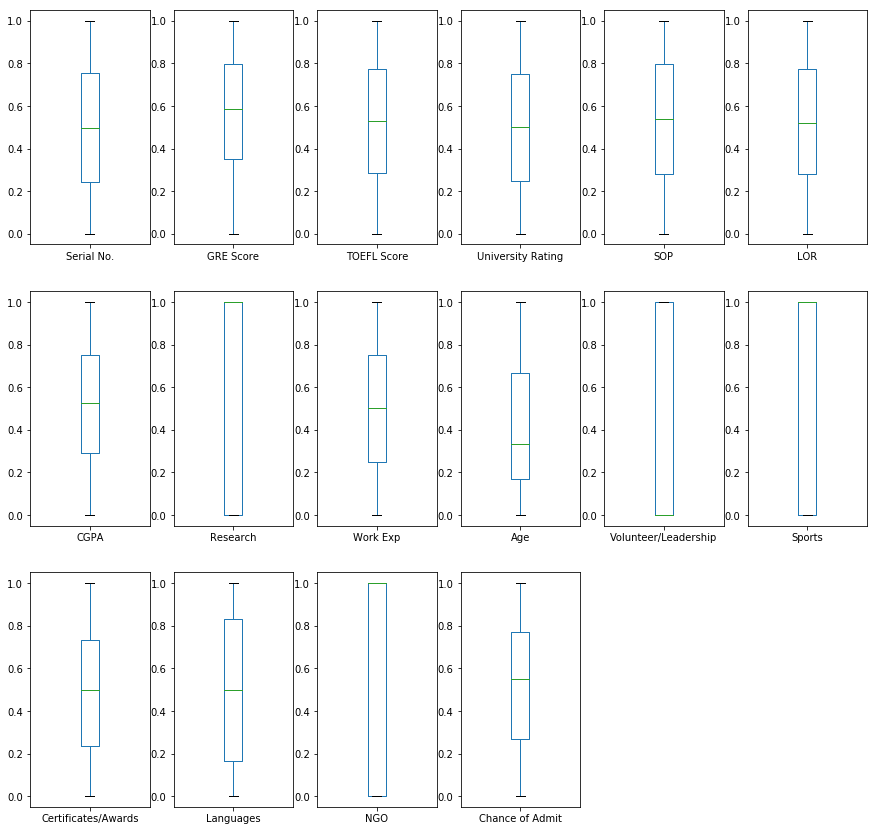

In [50]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 25
x2_train.plot(kind='box', subplots=True,layout=(5,6), sharex=False, sharey=False)
plt.show()

# SVM for Admission Dataset

In [5]:
# implementing SVM for different kernels
from sklearn.svm import SVC
score = []
accuracy = []
precision = []
recall = []
f1 = []
for kernel in ('linear', 'poly', 'rbf','sigmoid'):
    svclassifier = SVC(kernel=kernel)  
    model1 = svclassifier.fit(x2_train, y2_train)  
    y2_pred = svclassifier.predict(x2_test)
    score.append(svclassifier.score(x2_test, y2_test))
    precision.append(precision_score(y2_test,y2_pred))
    accuracy.append(accuracy_score(y2_test,y2_pred))
    recall.append(recall_score(y2_test,y2_pred))
    f1.append(f1_score(y2_test,y2_pred))

In [6]:
accuracy

[0.985906470211403, 0.9301729660474055, 0.9750160153747598, 0.968609865470852]

In [7]:
precision

[0.9785522788203753,
 0.9644444444444444,
 0.9628154050464808,
 0.9549668874172186]

In [8]:
f1

[0.9851551956815114,
 0.9227498228206944,
 0.9738079247817326,
 0.9671361502347419]

In [9]:
recall

[0.9918478260869565,
 0.8845108695652174,
 0.9850543478260869,
 0.9796195652173914]

In [11]:
svclassifier = SVC(kernel="linear")  
model2 = svclassifier.fit(x2_train, y2_train) 
y_pred = svclassifier.predict(x2_test)

In [12]:
cm_svm = confusion_matrix(y2_test,y_pred)

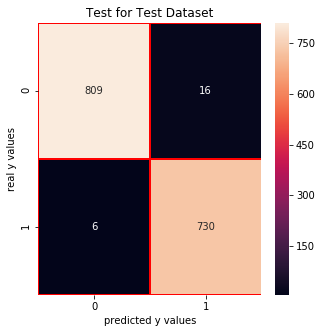

In [13]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_svm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

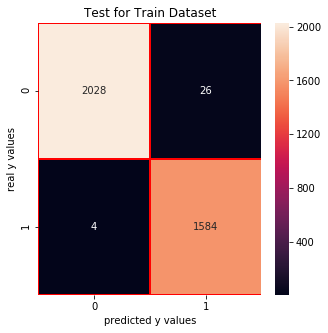

In [16]:
cm_svm_train = confusion_matrix(y2_train,svclassifier.predict(x2_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_svm_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

# Using K fold cross validation

In [17]:
x2[x2.columns] = scalerX.fit_transform(x2[x2.columns])
svclassifier = SVC(kernel='linear')  
cross_val_score(svclassifier, x2, y2, scoring='accuracy', cv = 5).mean()

0.9859713257870985

# Decsion Tree for Admission Dataset


In [18]:
dtc = DecisionTreeClassifier(criterion = "entropy")
dtc.fit(x2_train,y2_train)
print("score: ", accuracy_score(y2_test,dtc.predict(x2_test)))

score:  1.0


In [19]:
dtc = DecisionTreeClassifier(criterion = "gini")
dtc.fit(x2_train,y2_train)
print("score: ", accuracy_score(y2_test,dtc.predict(x2_test)))

score:  1.0


In [20]:
# Experimenting with pruning
for i in range(1,20):
    
    #dtc = DecisionTreeClassifier(criterion = "entropy", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)
    dtc = DecisionTreeClassifier(criterion = "gini",splitter = 'random', max_depth = i)
    dtc.fit(x2_train,y2_train)
    print("score: ", dtc.score(x2_test,y2_test))


score:  0.9000640614990391
score:  0.9762972453555413
score:  0.7655349135169763
score:  0.9410634208840487
score:  0.9929532351057014
score:  1.0
score:  1.0
score:  1.0
score:  1.0
score:  1.0
score:  1.0
score:  1.0
score:  1.0
score:  1.0
score:  0.9987187700192185
score:  1.0
score:  1.0
score:  1.0
score:  1.0


In [ ]:
for i in range(1,20):
    
    #dtc = DecisionTreeClassifier(criterion = "entropy", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)
    dtc = DecisionTreeClassifier(criterion = "entropy",splitter = 'random', max_depth = i)
    dtc.fit(x2_train,y2_train)
    print("score: ", dtc.score(x2_test,y2_test))

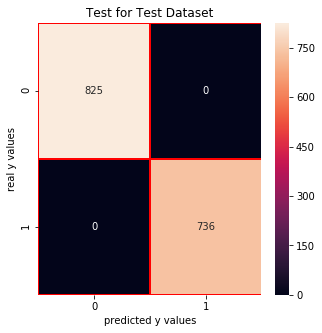

In [23]:
cm_dtc = confusion_matrix(y2_test,dtc.predict(x2_test))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_dtc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [28]:
print("accuracy_score: ", accuracy_score(y2_test,dtc.predict(x2_test)))
print("precision_score: ", precision_score(y2_test,dtc.predict(x2_test)))
print("recall_score: ", recall_score(y2_test,dtc.predict(x2_test)))
print("f1_score: ",f1_score(y2_test,dtc.predict(x2_test)))

accuracy_score:  1.0
precision_score:  1.0
recall_score:  1.0
f1_score:  1.0


# Boosting for Admission Dataset

In [29]:
AdaBoost = AdaBoostClassifier(base_estimator= dtc,learning_rate=1)
AdaBoost.fit(x2_train,y2_train)
prediction = AdaBoost.score(x2_test,y2_test)
prediction

1.0

In [30]:
for i in range(1,20):
    
    #dtc = DecisionTreeClassifier(criterion = "entropy", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= i)
    dtc = DecisionTreeClassifier(criterion = "gini",splitter = 'random', max_depth = i)
    AdaBoost = AdaBoostClassifier(base_estimator= dtc,learning_rate=1)
    AdaBoost.fit(x2_train,y2_train)
    prediction = AdaBoost.score(x2_test,y2_test)
    print("accuracy score: ", accuracy_score(y2_test,AdaBoost.predict(x2_test)))

accuracy score:  0.9737347853939782
accuracy score:  1.0
accuracy score:  1.0
accuracy score:  0.9967969250480462
accuracy score:  0.9993593850096092
accuracy score:  1.0
accuracy score:  0.9967969250480462
accuracy score:  1.0
accuracy score:  1.0
accuracy score:  1.0
accuracy score:  1.0
accuracy score:  1.0
accuracy score:  1.0
accuracy score:  0.9980781550288277
accuracy score:  1.0
accuracy score:  1.0
accuracy score:  1.0
accuracy score:  1.0
accuracy score:  1.0
